# AIPI 590 - XAI | Assignment #3
Interpretable Machine Learning for Customer Churn Prediction

## Rishabh Shah

## **Introduction**

In this assignment, we analyze a telecommunications dataset to understand the factors contributing to customer churn and develop interpretable models to predict churn risk. The dataset contains information about customers' demographics, account details, and service usage. Our objective is to build and compare different models—Linear Regression, Logistic Regression, and Generalized Additive Models (GAM)—to identify key predictors of churn and provide actionable insights for the company.

## **Dataset Description**

The dataset used in this analysis is sourced from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code). It includes various features such as customer demographics, account information, and service usage metrics. The target variable is `Churn`, indicating whether a customer has left the company (`Yes`) or stayed (`No`).



## **Exploratory Data Analysis (EDA)**

### **Loading the Data**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Telco-Customer-Churn.csv')
# url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/telco-customer-churn.csv"
# data = pd.read_csv(url)
# Display first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [48]:
# Check for missing values
data.isnull().sum()

# Drop customerID as it's irrelevant for analysis
data.drop('customerID', axis=1, inplace=True)

# Convert 'TotalCharges' to numeric, coerce errors to handle spaces
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values in 'TotalCharges'
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

/var/folders/rt/04s6gpr96lg2h27gtgpnfnn40000gn/T/ipykernel_53797/3234684695.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


### Descriptive Statistics

In [49]:
# Summary statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Target Variable Distribution
# Plot distribution of the target variable


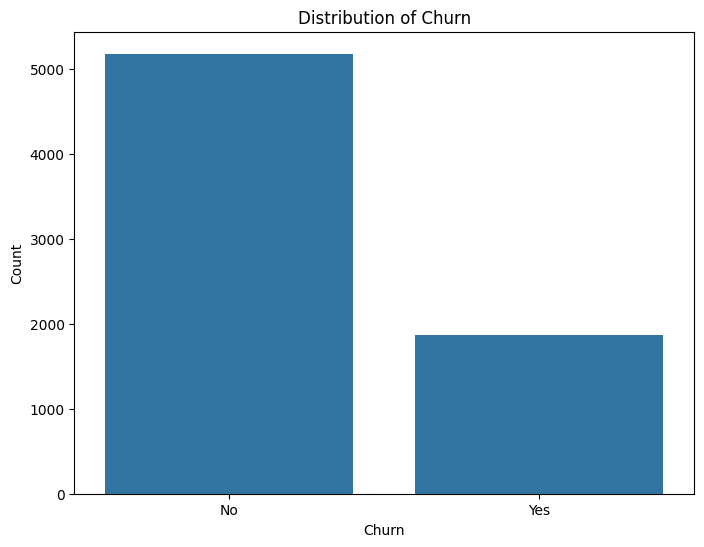

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Feature Analysis

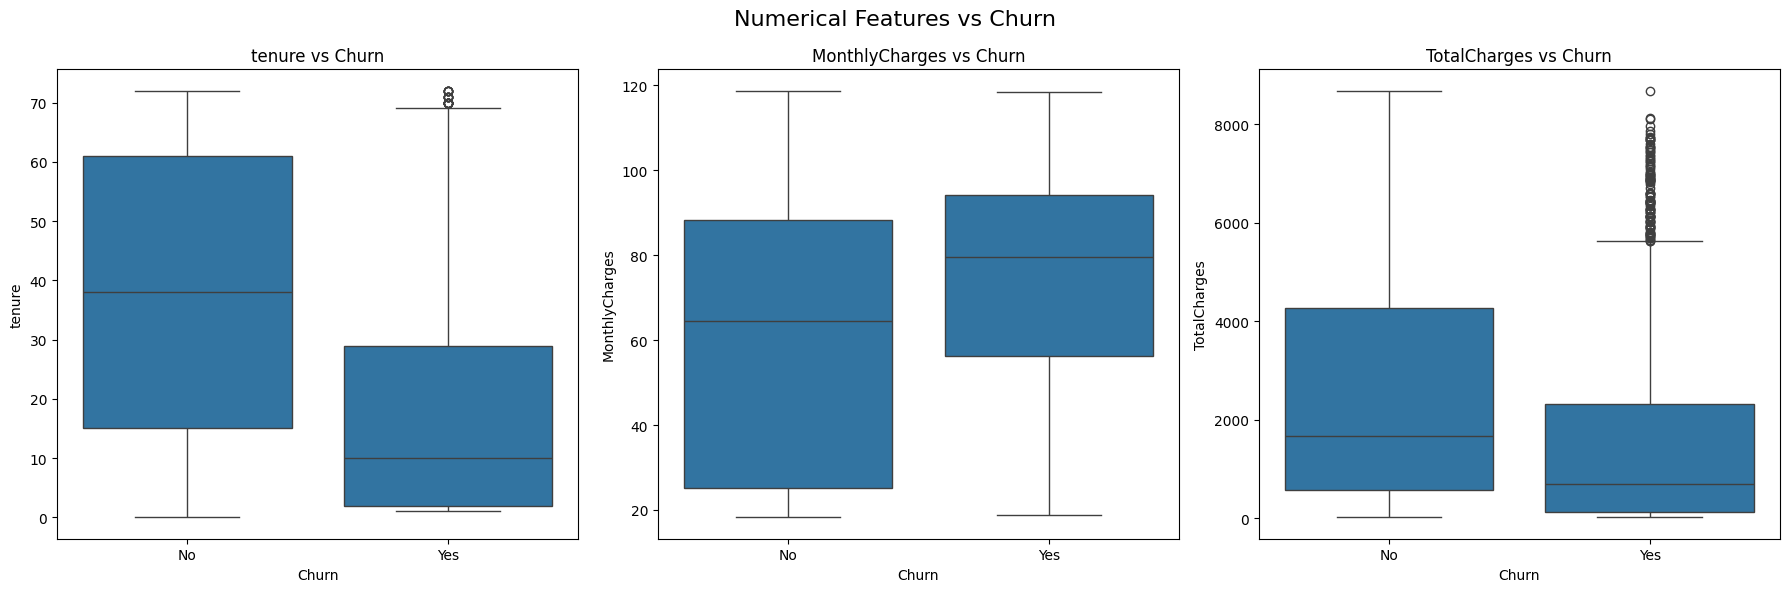

In [51]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Numerical Features vs Churn', fontsize=16)

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='Churn', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

## Categorical Features vs. Churn


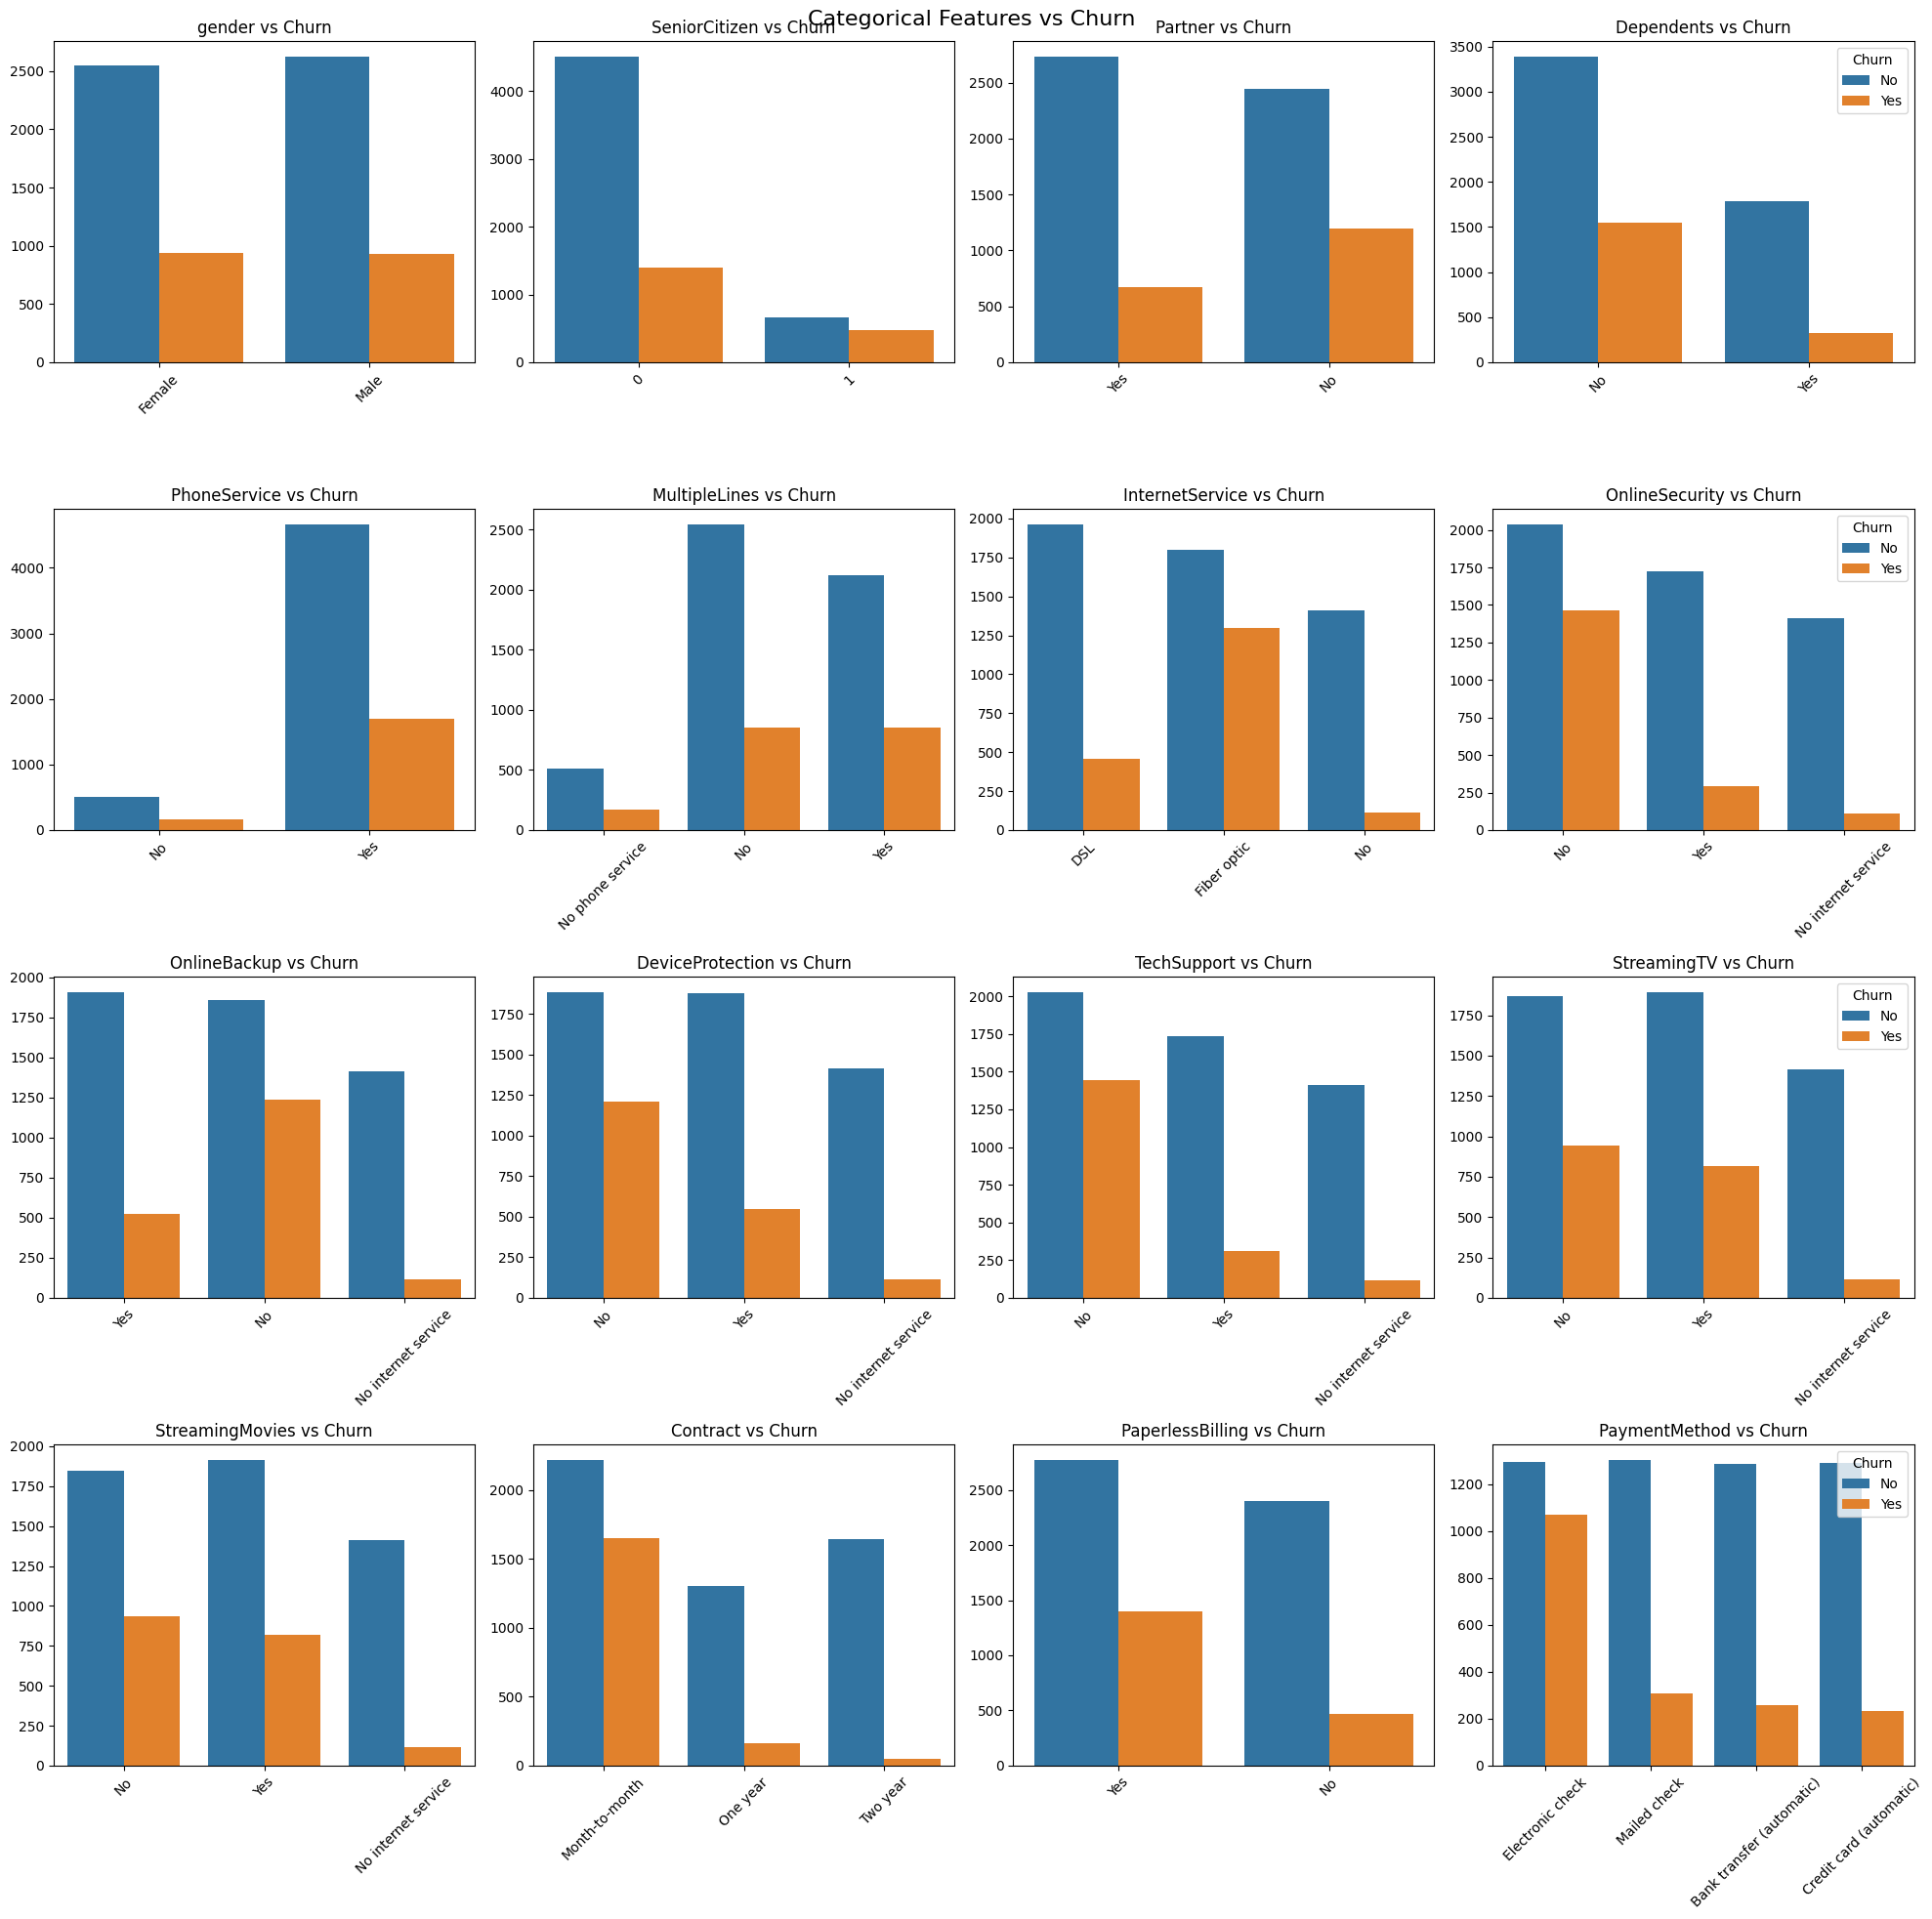

In [52]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calculate the number of rows needed (4 plots per row)
n_rows = (len(categorical_features) + 3) // 4

fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
fig.suptitle('Categorical Features vs Churn', fontsize=16)

for i, feature in enumerate(categorical_features):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    sns.countplot(x=feature, hue='Churn', data=data, ax=ax)
    ax.set_title(f'{feature} vs Churn')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    
    # Remove y-axis label to save space
    ax.set_ylabel('')
    
    # Only show legend for the rightmost plots
    if col != 3:
        ax.get_legend().remove()

# Remove any unused subplots
for i in range(len(categorical_features), n_rows * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## Correlation Matrix

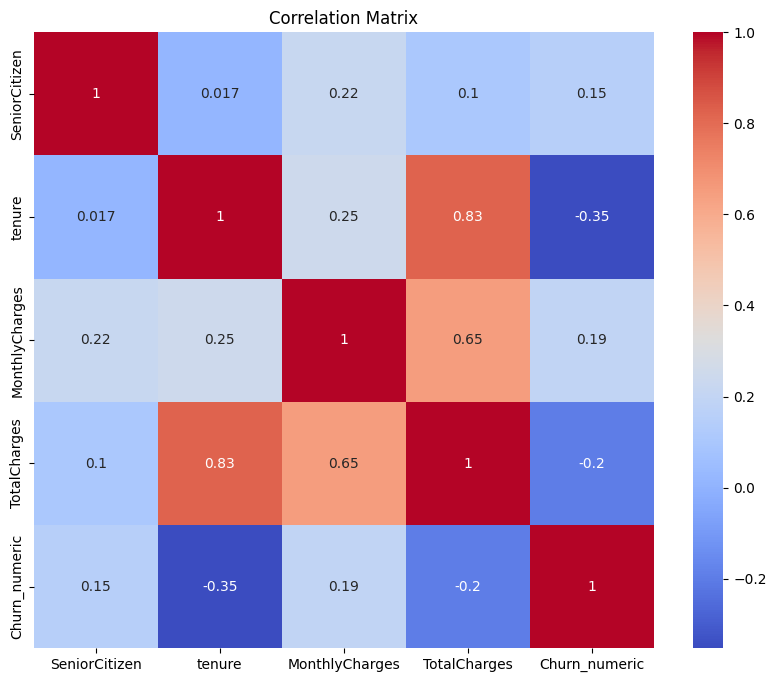

In [54]:
# Encode 'Churn' as numeric for correlation
data['Churn_numeric'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Correlation matrix for numerical features
plt.figure(figsize=(10,8))
correlation = data[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

### Encoding Categorical Variables

In [55]:
# Drop original 'Churn' column as we have 'Churn_numeric'
data_model = data.drop(['Churn'], axis=1)

# One-hot encoding for categorical variables
data_model = pd.get_dummies(data_model, drop_first=True)

# Display the first few rows of the processed data
data_model.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_numeric,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# Feature Scaling

Rationale: Scaling numerical features helps in improving model performance, especially for models sensitive to feature scales like Logistic Regression.

In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Select numerical features for scaling
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply scaler
data_model[num_features] = scaler.fit_transform(data_model[num_features])

# Display scaled features
data_model.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_numeric,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.959674,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.194766,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# Modeling

### Splitting the Data

In [62]:
from sklearn.model_selection import train_test_split

# Features and target
X = data_model.drop('Churn_numeric', axis=1)
y = data_model['Churn_numeric']

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
y_train

3738    0
3151    0
4860    0
3867    0
3810    0
       ..
6303    0
6227    1
4673    1
2710    0
5639    0
Name: Churn_numeric, Length: 5634, dtype: int64

# Linear Regression Model

### Treating Churn as a Continuous Variable


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
lin_reg = LinearRegression()
lin_reg.fit(X_train_res, y_train_res)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Performance
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f'Linear Regression MSE: {mse_lin}')
print(f'Linear Regression R²: {r2_lin}')

NameError: name 'X_train_res' is not defined

## Interpretation of Coefficients

The coefficients indicate the direction and magnitude of each feature's impact on the probability of churn. Positive coefficients suggest an increase in the feature value increases the likelihood of churn, while negative coefficients suggest the opposite.

In [ ]:
# Coefficients
coefficients = pd.Series(lin_reg.coef_, index=X.columns)
coefficients.sort_values(ascending=False).head(10)

## Logistic Regression

### Treating Churn as a Binary Variable

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ensure 'Churn' is correctly encoded and handle NaN values
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})
data = data.dropna(subset=['Churn'])

# Features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_prob = log_reg.predict_proba(X_test)[:,1]
y_pred_log = log_reg.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy}')
print(classification_report(y_test, y_pred_log))

## Interpretation of Coefficients

In logistic regression, the coefficients represent the log-odds of the target variable. A positive coefficient increases the log-odds of churn, whereas a negative coefficient decreases it.

In [ ]:
# Coefficients
log_coefficients = pd.Series(log_reg.coef_, index=X.columns)
log_coefficients.sort_values(ascending=False).head(10)

## Generalized Additive Model (GAM)

### Building the GAM

In [ ]:
import pygam
from pygam import LogisticGAM, s, f

# Select features for GAM
gam_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] + [
    col for col in X.columns if col not in numerical_features
]

# Initialize GAM with spline terms for continuous variables
gam = LogisticGAM(
    s(0) + s(1) + s(2) + 
    f(3) + f(4) + f(5) + f(6) + f(7) + f(8) + f(9) + f(10) +
    f(11) + f(12) + f(13) + f(14) + f(15)
).fit(X_train.values, y_train.values)

# Predictions
y_pred_gam = gam.predict(X_test.values)

# Performance
accuracy_gam = accuracy_score(y_test, y_pred_gam)
print(f'GAM Accuracy: {accuracy_gam}')
print(classification_report(y_test, y_pred_gam))

### Interpretation of the GAM

The GAM allows for modeling non-linear relationships between the predictors and the probability of churn. The summary provides insights into the significance and effect of each feature.

In [ ]:
# Summary of the GAM
gam.summary()